<a href="https://colab.research.google.com/github/tstakuma/git-practice/blob/main/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

クラスタリング

主成分分析とは違う観点
また組み合わせることも可能

多変量解析の一種

データマイニングの手法

クラスタリング
＝データの類似性に基づいて、データをグループ分けする

クラスタリングの仕組み

・階層的クラスタリング

→サンプルサイズが少ない場合に有効

・非階層的クラスタリング

→比較的多量のデータにも適用ができる

非階層的クラスタリング

　データ全体を見て、類似しているデータの塊を作っていく

クラスタリングでは、

グループを自動で分ける

どのようなデータの集まりなのか、人間側で判断する

クラスタリングのアルゴリズム

K-means（k-平均法）



1.   予め決められたクラスタの数と同じ数の線とロイドを、元のデータからランダムに選択（初期値）

2.   セントロイドからの距離をもとに、各データを紐づけてクラスタを形成

3. 形成されたクラスタの重心を求めて、セントロイドを移動

4. 再度、セントロイドからの距離を元に各データを紐づけ直す

クラスタリングの実装

In [142]:
!pip install -q japanize_matplotlib


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 10

In [144]:
# データの読み込み
df = pd.read_csv('academic_ability.csv')
df.head(3)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
0,2,3,4,3,3,4,3,2,3,2
1,5,4,3,3,3,2,4,3,4,5
2,3,3,3,4,3,4,3,4,4,3


データのキャスト（データ型変換）

k-meansではデータをNumPyのndarray（多次元配列）
Pandas型→NumPy型への変換は.valuesで実行可能

In [145]:
type(df)

pandas.core.frame.DataFrame

In [146]:
x = df.values
type(x)

numpy.ndarray

クラスタリングの実行

k-means法の問題点

ー 初期値依存

クラスタリングにおけるクラスターの数は人間側で決定する必要がある

・**クラスタの数（kの値）は人間が決める値**


人間があらかじめ決定しておくアルゴリズムの精度に依存するような値

＝ハイパラメーター

実際には数学的に最適な値を決める方法があるが、今は決め打ち

Scikit-kearnのkMeansの場合、n_clustersという引数でクラスタの数を指定

**乱数を固定する**

初期値依存の問題はクラスターの初期値をある程度ランドむに決めることが原因

乱数の固定＝再現性を確保するため

In [147]:
from sklearn.cluster import KMeans

# インスタンス化
kmeans = KMeans(n_clusters=4, random_state=0)

ステップ

元データの法則を見つけ出す学習

.fit()

データに対して予測を行う

.predict() 

元々学習に用いたデータに対して振られているクラスタの値を取得する

.labels_ 

でも可能

In [148]:
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

In [149]:
cluster = kmeans.labels_
print(cluster)

[2 1 2 1 2 2 2 0 3 2 2 1 2 1 0 3 1 1 2 1 2 2 1 0 2 1 1 2 3 0 2 2 0 2 1 1 2
 2 0 3]


In [150]:
df['cluster'] = cluster
df.head(3)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語,cluster
0,2,3,4,3,3,4,3,2,3,2,2
1,5,4,3,3,3,2,4,3,4,5,1
2,3,3,3,4,3,4,3,4,4,3,2


このデータを元に解析を進め、各クラスタ毎の特徴を捉えていく


クラスタリングの結果を確認


groupby()を使用

In [151]:
groups = df.groupby('cluster')

In [152]:
groups.size()

cluster
0     6
1    12
2    18
3     4
dtype: int64

In [153]:
groups.agg(['min', 'max','mean', 'median' ])

現代文                       古文                       数学      ...  \
        min max      mean median min max      mean median min max  ...   
cluster                                                            ...   
0         5   5  5.000000    5.0   5   5  5.000000    5.0   4   5  ...   
1         2   5  3.916667    4.0   2   5  3.833333    4.0   2   3  ...   
2         1   4  3.000000    3.0   1   4  3.000000    3.0   3   5  ...   
3         1   3  1.750000    1.5   1   2  1.500000    1.5   1   2  ...   

              世界史        政治経済                       英語                       
             mean median  min max      mean median min max      mean median  
cluster                                                                      
0        4.666667    5.0    3   5  4.666667    5.0   4   5  4.833333    5.0  
1        3.916667    4.0    3   5  3.833333    4.0   3   5  4.416667    5.0  
2        3.111111    3.0    1   5  3.277778    3.0   1   5  2.944444    3.0  
3        2.000000    2.0    1   3  2.250000    2.5   1   2  1.500000    1.5  

[4 rows x 40 columns]

In [154]:
mean = groups.mean()
mean

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語
cluster,,,,,,,,,,
0,5.000000,5.000000,4.666667,4.666667,4.833333,4.666667,4.500000,4.666667,4.666667,4.833333
1,3.916667,3.833333,2.500000,2.833333,2.916667,2.333333,3.916667,3.916667,3.833333,4.416667
2,3.000000,3.000000,4.000000,3.777778,3.611111,4.000000,3.111111,3.111111,3.277778,2.944444
3,1.750000,1.500000,1.500000,1.250000,1.250000,1.250000,2.000000,2.000000,2.250000,1.500000


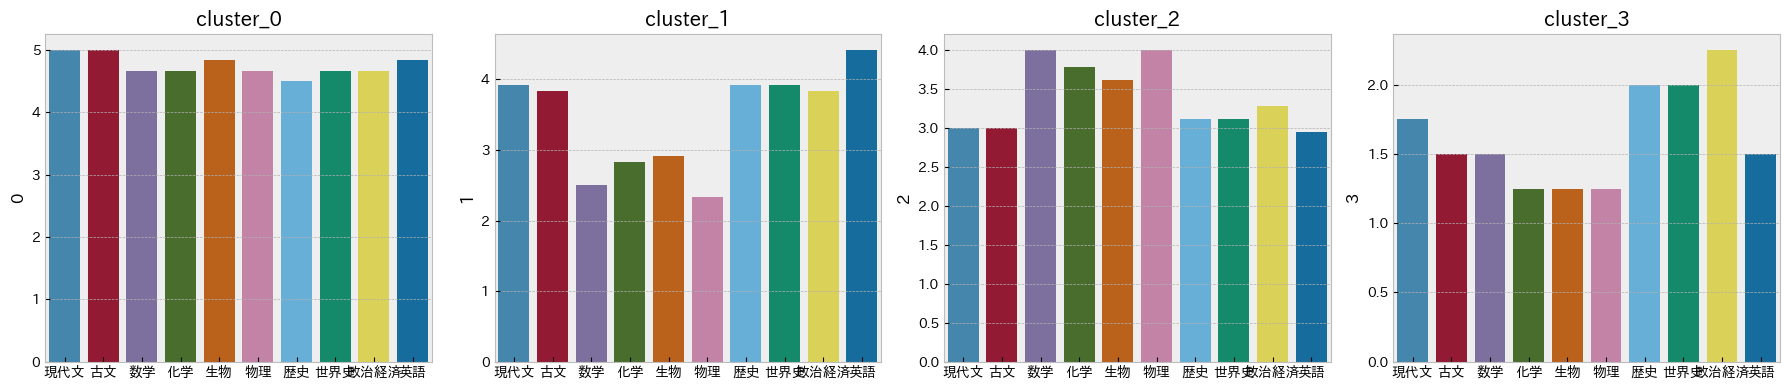

In [155]:
plt.figure(figsize=(18,4))

num = kmeans.n_clusters

for n in range(num):
  plt.subplot(1, num, n+1)
  plt.title(f'cluster_{n}')
  sns.barplot(x=mean.columns, y=mean.loc[n])
  plt.tight_layout()

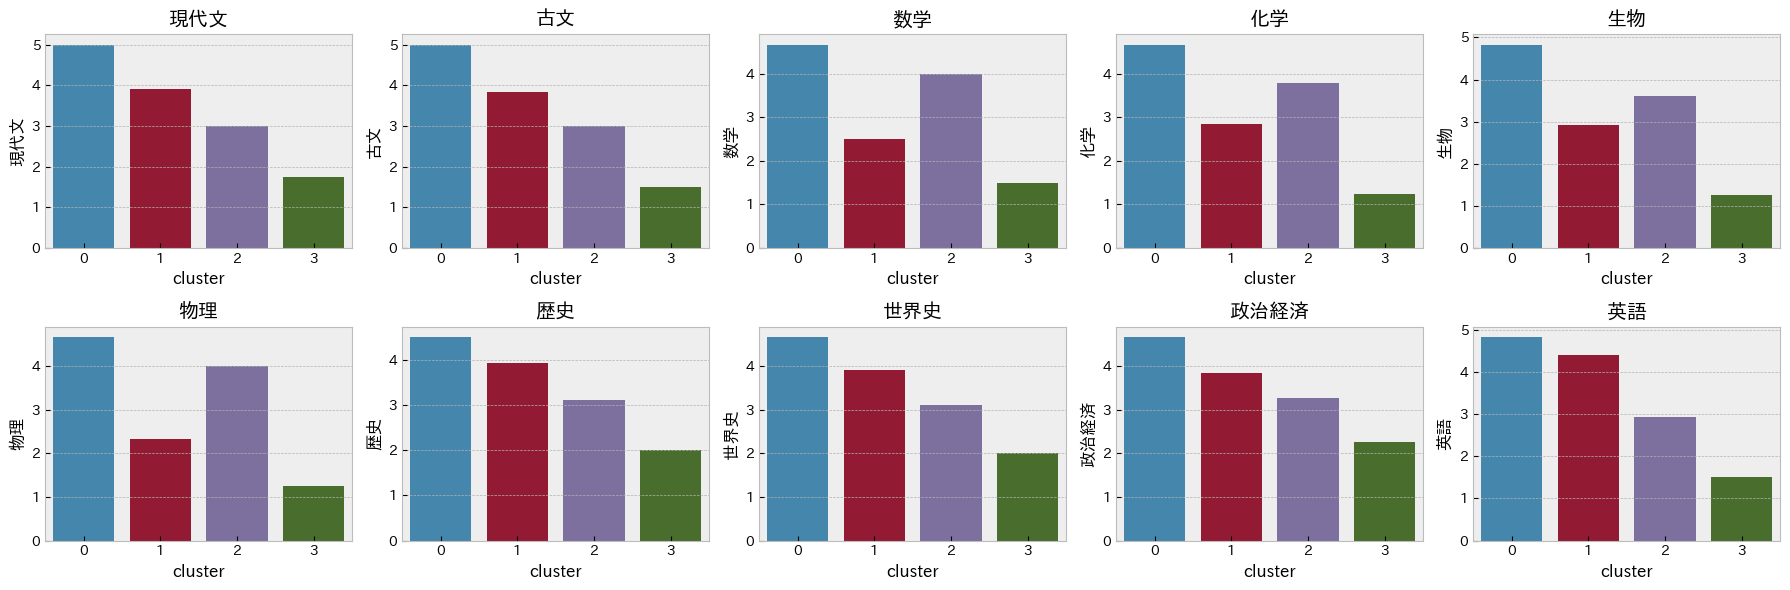

In [156]:
plt.figure(figsize=(18,6))

for n, col in enumerate(mean.columns):
  plt.subplot(2,5, n+1)
  plt.title(f'{col}')
  sns.barplot(x=mean.index, y=mean[col])
  plt.tight_layout()

**傾向をみる**

cluster0

cluster1

cluster2

cluster3

*施策の提案*
データに関する知識

＝ドメイン知識

※とはいえ施策を立ててみる

最適なクラスタ数の決め方

エルボー法

→クラスター数を変えながら残差平方和を求め、
最適なクラスター数を見つける方法

k-measn法の目的

→すべてのクラスターの残差平方和を算出し、その合計を最小にすること

※最初は決め打ちでもよい

残差平方和

＝各クラスタの重心から各点までの距離の総和

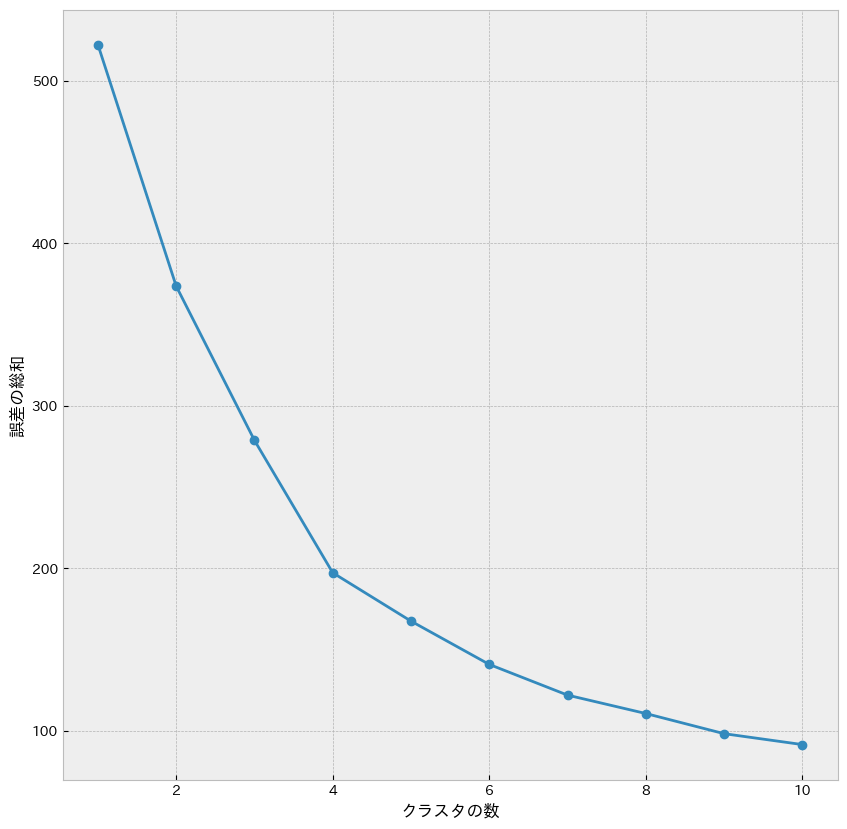

In [157]:
distortions = []
for i in range(1,11):
  km = KMeans(n_clusters=i,
              n_init=10,
              random_state=0)
  km.fit(x)
  distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

エルボー法は残差平方和とクラスタ数がともに小さい組み合わせを見つける

曲がっている点を最適なクラスタの数とする

主成分分析とクラスタ

主成分分析の定義が明確であれば、

各クラスタ毎の傾向を読み解くヒントになるかも

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2, random_state=0)

In [160]:
# データの標準化
x_scaled = scaler.fit_transform(x)  

# 主成分分析の実行  
feature = pca.fit_transform(x_scaled)

In [161]:
new_df = df.copy()
new_df.head(2)

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語,cluster
0,2,3,4,3,3,4,3,2,3,2,2
1,5,4,3,3,3,2,4,3,4,5,1


In [162]:
new_df[['PC1', 'PC2']] = feature
new_df.head()

,現代文,古文,数学,化学,生物,物理,歴史,世界史,政治経済,英語,cluster,PC1,PC2
0,2,3,4,3,3,4,3,2,3,2,2,1.582937,1.522060
1,5,4,3,3,3,2,4,3,4,5,1,-0.537827,-1.654101
2,3,3,3,4,3,4,3,4,4,3,2,0.107779,0.336046
3,5,5,3,3,3,3,4,4,4,5,1,-1.339368,-1.645856
4,4,3,4,5,4,3,3,3,4,3,2,-0.518339,0.969427


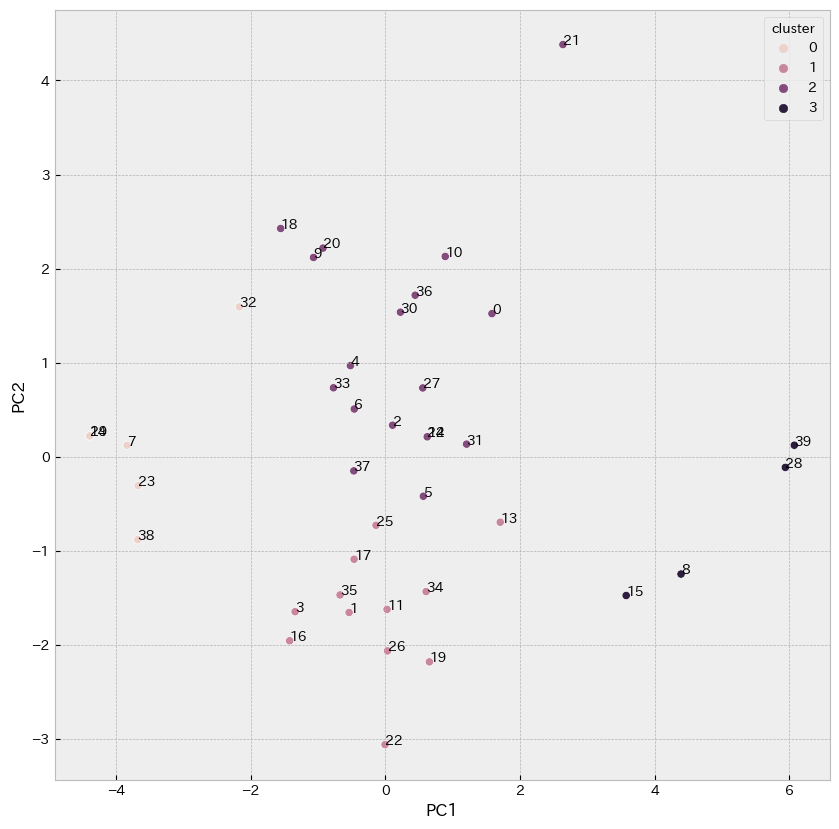

In [163]:
plt.figure(figsize=(10, 10))

for x, y, name in zip(new_df['PC1'], new_df['PC2'], list(range(len(new_df)))):
    plt.text(x, y, name)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=new_df);

↑かなり綺麗に別れているらしい